/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The accuracy score of K-Mean:  0.8933333333333333
The Confusion matrixof K-Mean:  [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


<ipython-input-2-f37e2da24b00>:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


The accuracy score of EM:  0.03333333333333333
The Confusion matrix of EM:  [[ 0  0 50]
 [45  5  0]
 [ 0 50  0]]


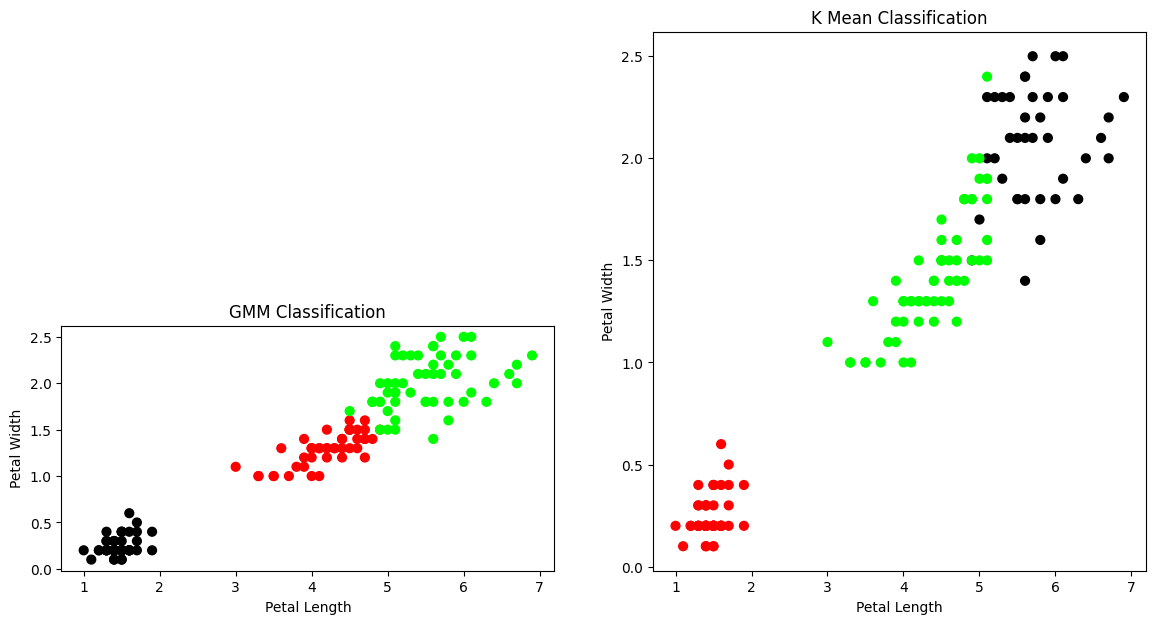

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))

In [1]:
import math

days = [70, 65, 90, 55, 100, 75, 80, 55, 30, 80]
std = 10
variance = std**2
k = 2 # sunny and cloudy days
avg_sunny = 80
avg_cloudy = 55

for n in range(1000):
    # estimator step
    E_sunny = []
    E_cloudy = []
    for i in range(len(days)):
        val_sunny = math.pow(math.e, (-0.5)/(variance) *
                             math.pow(days[i]-avg_sunny, 2))
        val_cloudy = math.pow(math.e, (-0.5)/(variance)
                              * math.pow(days[i]-avg_cloudy, 2))
        E_sunny.append(val_sunny/(val_sunny + val_cloudy))
        E_cloudy.append(val_cloudy/(val_sunny + val_cloudy))

    # maximization step
    sunny_numerator = 0
    sunny_denominator = sum(E_sunny)
    cloudy_numerator = 0
    cloudy_denominator = sum(E_cloudy)

    for i in range(len(days)):
        sunny_numerator += E_sunny[i]*days[i]
        cloudy_numerator += E_cloudy[i]*days[i]
    if (sunny_numerator/sunny_denominator) - avg_sunny <= 0.1 and (cloudy_numerator/cloudy_denominator) - avg_cloudy <= 0.1:
        break
    avg_sunny = sunny_numerator/sunny_denominator
    avg_cloudy = cloudy_numerator/cloudy_denominator

    print(avg_sunny, avg_cloudy)

82.00761549152422 52.981059926333586
82.12894336998127 52.562823852049945
